# MI 2 SoSe22: Exercise sheet 2

For more information, you can also check the solutions of all exercise sheets from another group of students of MI 2 from 2016 [in this repository](https://github.com/jrieke/machine-intelligence-2).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm # for colors
import seaborn as sns
import math

## Exercise H2.1: Preprocessing

##### a)

Here we load, center the data and plot it. From the latter we can already identify two outliers present in the 17 and 157 positions of the data.

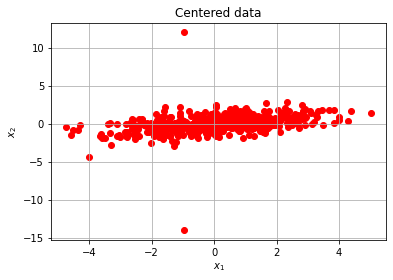

In [2]:
# Loads and center data (dimensions Nxp)
data = np.genfromtxt(fname='pca2.csv', delimiter=',', dtype=np.float, skip_header = 1).T
data_centered = data - np.expand_dims(np.mean(data, axis = 1), axis = 1)

# Scatter plot for centered data
plt.scatter(data_centered[0], data_centered[1], marker = 'o', color = 'r')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title("Centered data")
plt.grid()
plt.show()

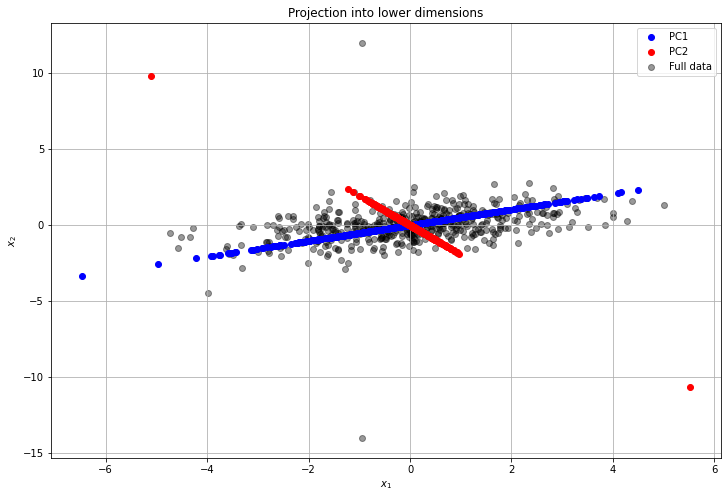

In [3]:
# Covariance and eigendecomposition
covariance = np.cov(data_centered)
eig_value, eig_vector = np.linalg.eig(covariance)

# Sorts eigenvalues and eigenvectors
sorted_index = np.argsort(eig_value)[::-1] # From highest to lowest
eig_value_sorted = eig_value[sorted_index]
eig_vector_sorted = eig_vector[:, sorted_index]

# Transforms centered data to one with diagonal covariance (u = M^t x)
data_transformed = np.dot(eig_vector_sorted.T, data_centered)

# PCs and projections of the data into PC1 and PC2
pc1 = eig_vector_sorted[:,0]
pc2 = eig_vector_sorted[:,1]
data_pc1 = np.array([u1*pc1 for u1 in data_transformed[0]]).T
data_pc2 = np.array([u2*pc2 for u2 in data_transformed[1]]).T

# Plots of full data an its projection into the subspaces spanned by PC1 and PC2 separately
plt.figure(figsize=(12,8))
plt.plot( data_pc1[0], data_pc1[1], 'bo', label = "PC1")
plt.plot( data_pc2[0], data_pc2[1], 'ro', label = "PC2")
plt.scatter( data_centered[0], data_centered[1], color = 'black', label = "Full data", alpha = 0.4)
plt.xlabel('$x_{1}$')
plt.ylabel('$x_{2}$')
plt.title("Projection into lower dimensions")
plt.grid()
plt.legend()
plt.show()

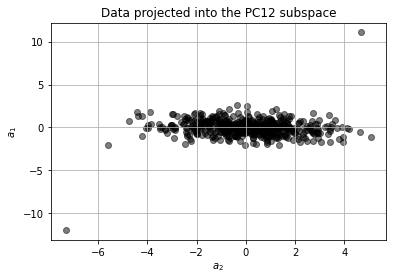

In [4]:
# PC2 vs PC1 plot
plt.scatter( data_transformed[0], data_transformed[1], color = "black", alpha = 0.5)
plt.xlabel('$a_{2}$')
plt.ylabel('$a_{1}$')
plt.title("Data projected into the PC12 subspace")
plt.grid()
plt.show()

##### b)

Now we remove the outliers and repeat the previous steps with a preprocessed data.

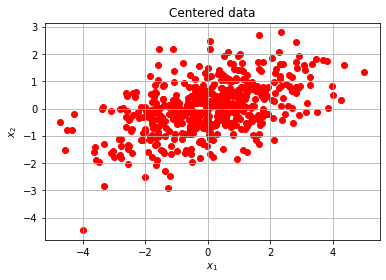

In [5]:
datapp = np.delete(data,[16,156], axis = 1)
datapp_centered = datapp - np.expand_dims(np.mean(datapp, axis = 1), axis = 1)

# Scatter plot for centered data
plt.scatter(datapp_centered[0], datapp_centered[1], marker = 'o', color = 'r')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title("Centered data")
plt.grid()
plt.show()

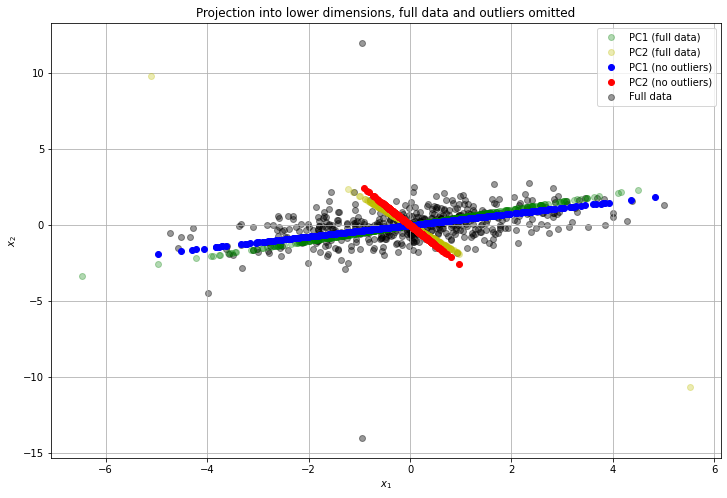

In [6]:
# Covariance and eigendecomposition
covariance = np.cov(datapp_centered)
eig_value, eig_vector = np.linalg.eig(covariance)

# Sorts eigenvalues and eigenvectors
sorted_index = np.argsort(eig_value)[::-1] # From highest to lowest
eig_value_sorted = eig_value[sorted_index]
eig_vector_sorted = eig_vector[:, sorted_index]

# Transforms centered data to one with diagonal covariance (u = M^t x)
data_transformed = np.dot(eig_vector_sorted.T, datapp_centered)

# PCs and projections of the data into PC1 and PC2
pc1 = eig_vector_sorted[:,0]
pc2 = eig_vector_sorted[:,1]
datapp_pc1 = np.array([u1*pc1 for u1 in data_transformed[0]]).T
datapp_pc2 = np.array([u2*pc2 for u2 in data_transformed[1]]).T

# Plots of full data an its projection into the subspaces spanned by PC1 and PC2 separately 
# considering the full data and the one without outliers.
plt.figure(figsize=(12,8))
plt.plot( data_pc1[0], data_pc1[1], 'go', label = "PC1 (full data)", alpha = 0.3)
plt.plot( data_pc2[0], data_pc2[1], 'yo', label = "PC2 (full data)", alpha = 0.3)
plt.plot( datapp_pc1[0], datapp_pc1[1], 'bo', label = "PC1 (no outliers)")
plt.plot( datapp_pc2[0], datapp_pc2[1], 'ro', label = "PC2 (no outliers)")
plt.scatter( data_centered[0], data_centered[1], color = 'black', label = "Full data", alpha = 0.4)
plt.xlabel('$x_{1}$')
plt.ylabel('$x_{2}$')
plt.title("Projection into lower dimensions, full data and outliers omitted")
plt.grid()
plt.legend()
plt.show()

## Exercise H2.2: Sphering/Whitening

##### a)

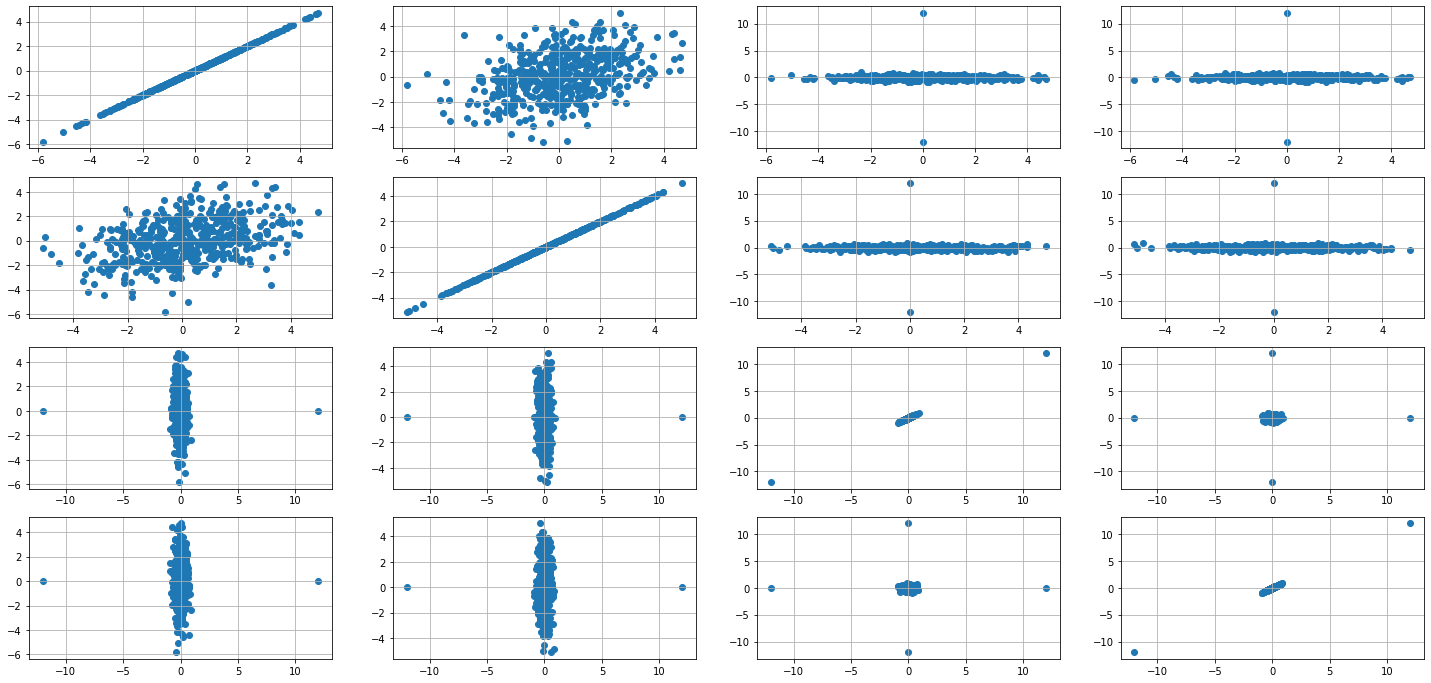

In [7]:
# Load data
data = np.genfromtxt(fname='pca4.csv', delimiter=',', dtype=np.float, skip_header = 1).T

# Plot each axes against each other to visualize the outliers
fig, axes = plt.subplots(4, 4, figsize=(25, 12))
for i in range(4):
    for j in range(4):
        plt.sca(axes[i,j])
        plt.scatter(data[i], data[j])
        plt.grid()
plt.show()

Since we identify that there are just 4 outliers (2 with large $x_3$ component and 2 with large $x_4$ component) we can eliminate them easily by hand.

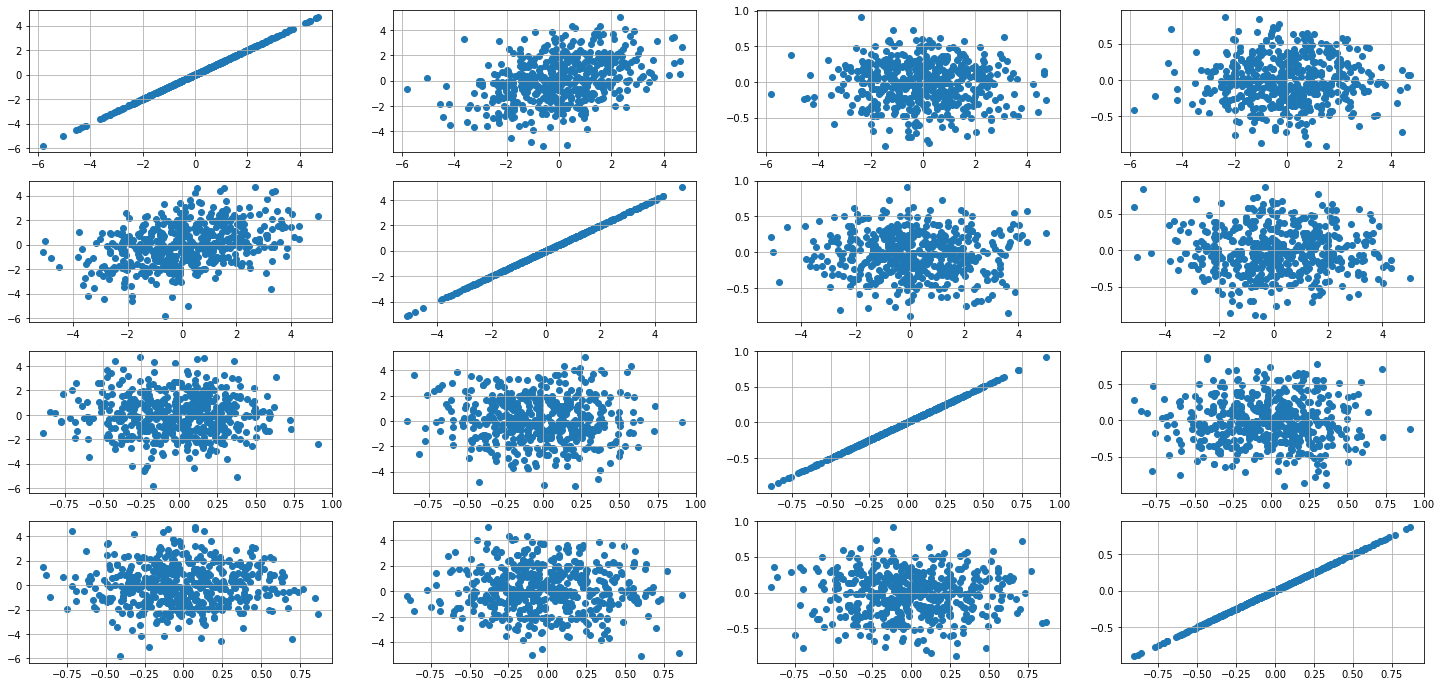

In [8]:
outliers_positions = np.where(np.abs(data) > 10)[1] # By visual inspection, all outliers are greater than 10
data_clean = np.delete(data, outliers_positions, axis = 1)

# Plot to confirm that ourliers were removed
fig, axes = plt.subplots(4, 4, figsize=(25, 12))
for i in range(4):
    for j in range(4):
        plt.sca(axes[i,j])
        plt.scatter(data_clean[i], data_clean[j])
        plt.grid()
plt.show()

##### b)

By performing PCA and inspecting the scree plot, we can see that the data is well represented by just the first two PCs.

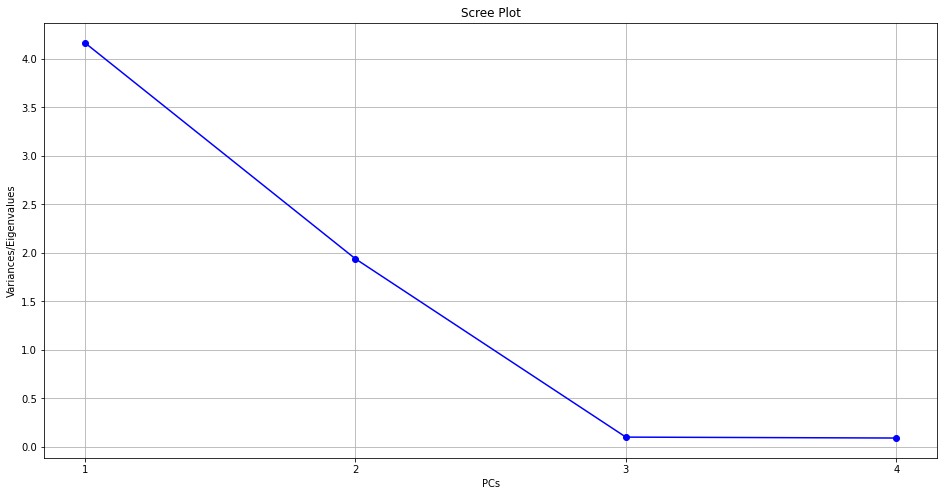

In [9]:
# Selects subset of the data
subset_size = len(data_clean[0])
data_subset = data_clean[:, :subset_size]

# Center data
data_centered = data_subset - np.expand_dims(np.mean(data_subset, axis = 1), axis = 1)

# Covariance and eigendecomposition
covariance = np.cov(data_centered)
eig_value, eig_vector = np.linalg.eig(covariance)

# Sorts eigenvalues and eigenvectors
sorted_index = np.argsort(eig_value)[::-1] # From highest to lowest
eig_value_sorted = eig_value[sorted_index]
eig_vector_sorted = eig_vector[:, sorted_index]

# Transforms centered data to one with diagonal covariance (u = M^t x)
data_transformed = np.dot(eig_vector_sorted.T, data_centered)

# Scree Plot
plt.figure(figsize = (16,8))
plt.plot([i for i in range(1,len(eig_value) + 1)], eig_value_sorted, 'b-', marker = 'o')
plt.xlabel("PCs")
plt.ylabel(r"Variances/Eigenvalues")
plt.title("Scree Plot")
plt.xticks(range(1,len(eig_value)+1))
plt.grid()
plt.show()

##### c)

In [10]:
# Brings eigenvalues into a diagonal matrix
eig_value_matrix = np.diag(eig_value_sorted)

# Apply Sphering or Whitening to transform the original (centered) data into a data set with 
# identity covariance matrix
data_sphering = np.linalg.inv(np.sqrt(eig_value_matrix)).dot(data_transformed)

##### d)

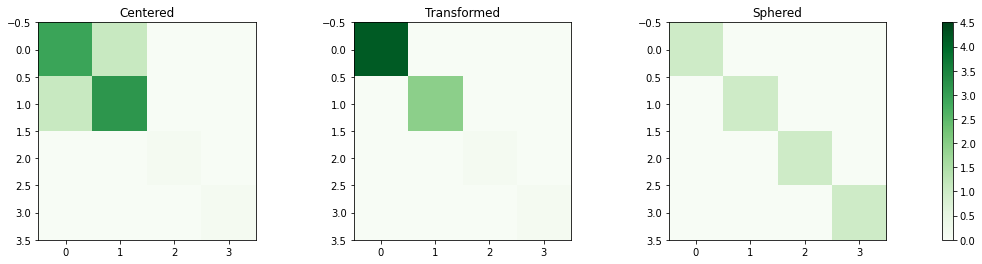

In [11]:
# Covariance matrix of transform data (diagonal)
covariance_transformed = np.cov(data_transformed)

# Covariance matrix of data after sphering (diagonal with 1s, a.k.a the identity)
covariance_sphering = np.cov(data_sphering)

# Heat-plot of the three different covariance matrix
fig, axes = plt.subplots(1, 3, figsize=(20, 4))
ax1, ax2, ax3 = axes
cov1 = ax1.imshow(covariance, cmap='Greens', interpolation='nearest', vmin = 0, vmax = 4.5)
ax1.set_title("Centered")
ax2.imshow(covariance_transformed, cmap='Greens', interpolation='nearest', vmin = 0, vmax = 4.5)
ax2.set_title("Transformed")
ax3.imshow(covariance_sphering, cmap='Greens', interpolation='nearest', vmin = 0, vmax = 4.5)
ax3.set_title("Sphered")
plt.colorbar(cov1, ax = axes)
plt.show()

## Exercise H2.4: Oja’s Rule: Application

In [12]:
# Loads data and remove first column
onlinedata = np.genfromtxt(fname = "data-onlinePCA.txt", delimiter = ",", skip_header = 1).T[1:] 

##### a)

In [13]:
# Breaks data into 10 time intervals of 1-second-long each
time_blocks = [onlinedata[:, i*200:(i+1)*200] for i in range(10)] #np.zeros((10, 2, 200))

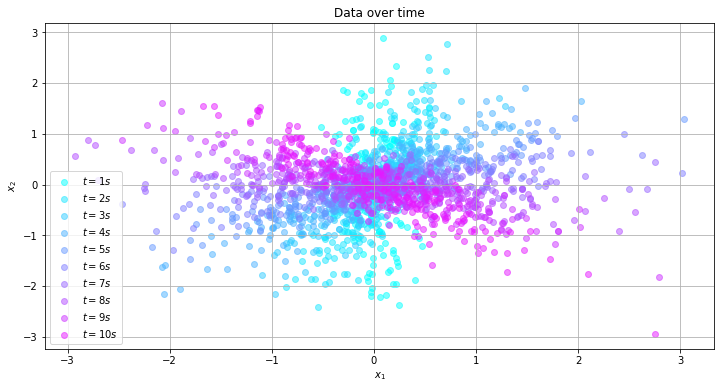

In [14]:
# Plots data at different times
plt.figure(figsize = (12,6))
cmap = cm.get_cmap('cool')
for i in range(10):
    # each block picks a different color from the color map
    plt.scatter(time_blocks[i][0], time_blocks[i][1], color = cmap(i/10), alpha = .5, label = f"$t = {i+1}s$")
plt.xlabel("$x_{1}$")
plt.ylabel("$x_{2}$")
plt.title("Data over time")
plt.legend()
plt.grid()
plt.show()

##### b)

In [88]:
pc1s = np.zeros((10,2))
for (i, block) in enumerate(time_blocks):
    covariance = np.cov(block)
    eig_value, eig_vector = np.linalg.eig(covariance)
    max_pos = np.argmax(eig_value)
    pc1 = eig_vector[:, max_pos]
    # Changes sign of some PCs so all point to the same direction in the following plot
    if i in range(3):
        pc1 = - pc1
    pc1s[i] = pc1

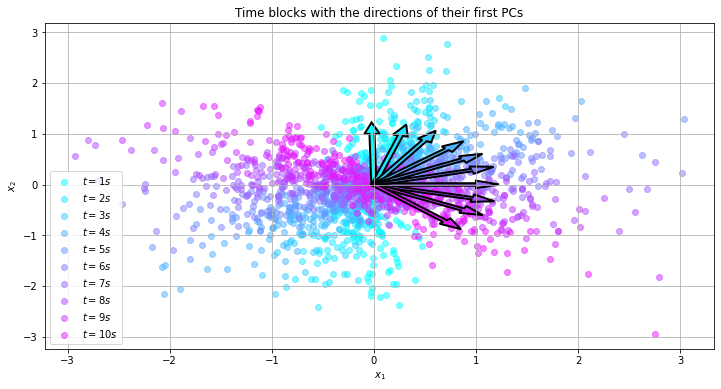

In [91]:
# Plots data at different times with direction of first PC for each block
plt.figure(figsize = (12,6))
cmap = cm.get_cmap('cool')
for i in range(10):
    plt.scatter(time_blocks[i][0], time_blocks[i][1], color = cmap(i/10), alpha = .5, label = f"$t = {i+1}s$")
    plt.arrow(0, 0, pc1s[i, 0], pc1s[i, 1], color = cmap(i/10), width = .05, lw = 2, ec = "black")
plt.xlabel("$x_{1}$")
plt.ylabel("$x_{2}$")
plt.title("Time blocks with the directions of their first PCs")
plt.legend()
plt.grid()
plt.show()

##### c)

In [107]:
# list of learning rates and weigths
learning_rates = [.002, .04, 0.45]
weigths = np.zeros((3, 2, 2001))

# Runs online-PCA algorithm for each learning rate
for (i, eps) in enumerate(learning_rates):
    # Initializes initial weigths randomly
    weigths[i,:, 0] = np.random.rand(2)
    for (j, x) in enumerate(onlinedata.T): 
        # Picks current weigth
        w = weigths[i,:, j]
        # Defines output for example x
        y = np.dot(w, x)
        # Oja's rule
        deltaW = eps*y*(x - y*w)
        weigths[i, :, j + 1] = w + deltaW

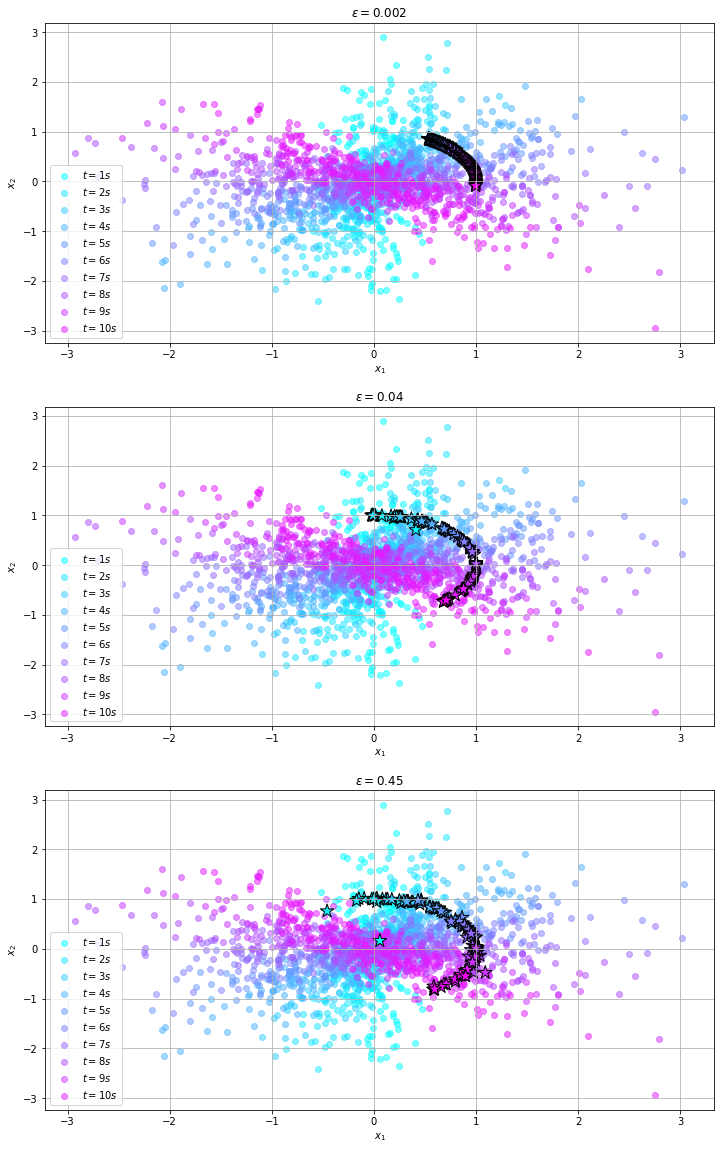

In [115]:
# Plots data together with the trained weigths for different learning rates
fig, axes = plt.subplots(3, 1, figsize=(12, 20))
cmap = cm.get_cmap('cool')
for (e, ax) in enumerate(axes.flatten()):
    plt.sca(ax)
    for i in range(10):
        plt.scatter(time_blocks[i][0], time_blocks[i][1], color = cmap(i/10), alpha = .5, label = f"$t = {i+1}s$")
    # Plot the components of the weigths every certain number of iterations
    plt.scatter(weigths[e, 0][::20], weigths[e, 1][::20], 
                c = np.linspace(0, 2001, 2001)[::20], cmap = cmap, 
                s = 200, marker = "*", edgecolors = 'black')
    plt.xlabel("$x_{1}$")
    plt.ylabel("$x_{2}$")
    plt.title(f"$\epsilon = {learning_rates[e]}$")
    plt.legend()
    plt.grid()
plt.show()

##### d)

We can see that $\epsilon = 0.002$ is too small so the weights never manage to catch the correct direction of the first PC, while $\epsilon = 0.45$ is too high. On the other hand $\epsilon = 0.04$ is optimal and the weigths at each time correspond to the correct first PC.